https://www.copict.ufscar.br/arquivos/edital-001-2022/roteiro-para-elaboracao-de-relatorio-parcial-de-ict.pdf

pdf do relatorio parcial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Modulos.modulos_auxiliares import *



has_valid_data serve para ver se o numero de superfice dos voxeis é maior do que 1

get_node1 e get_node2 da pra fazer com os nós da função do pyvane, acho que a função de simplificação com adaptação da pra fazer isso ai



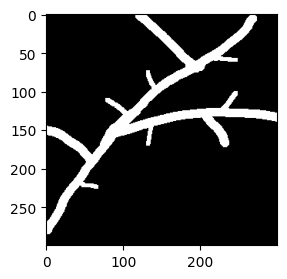

In [2]:
img = plt.imread('Vaso_amao.png')
img = (1 - img).astype(np.uint8)
img = transform_rgb_to_gray(img)

# print('Valores unicos:', np.unique(img))
# print(im.Image(img))

plt.figure(figsize = (3,3))
plt.imshow(img, 'gray')

In [3]:
img_skel = np.array((skimage.morphology.skeletonize(img, method = 'lee')))
#plt.imshow(merge_image(img, img_skel))

In [4]:
graph_skeleton = creation.create_graph(im.Image(img_skel))
graph_skeleton = ad.simplify(graph_skeleton)
graph_skeleton = ad.adjust_graph(graph_skeleton, 0)

In [5]:
node_att = graph_skeleton.nodes(data = True)
node_att[0]['radius']=10

In [6]:
node_att[0]

{'pixels': [(53, 221)],
 'center': (53, 221),
 'type': 0,
 'ndim': 2,
 'branches': [(54, 220), (54, 222), (52, 221)],
 'old_id': 0,
 'radius': 10}

In [7]:
graph_skeleton.nodes(data = True)

NodeDataView({0: {'pixels': [(53, 221)], 'center': (53, 221), 'type': 0, 'ndim': 2, 'branches': [(54, 220), (54, 222), (52, 221)], 'old_id': 0, 'radius': 10}, 1: {'pixels': [(68, 188)], 'center': (68, 188), 'type': 0, 'ndim': 2, 'branches': [(69, 187), (67, 187), (68, 189)], 'old_id': 1}, 2: {'pixels': [(97, 142)], 'center': (97, 142), 'type': 0, 'ndim': 2, 'branches': [(97, 143), (98, 141), (96, 141)], 'old_id': 2}, 3: {'pixels': [(126, 231)], 'center': (126, 231), 'type': 0, 'ndim': 2, 'branches': [(127, 230), (127, 232), (125, 232)], 'old_id': 3}, 4: {'pixels': [(130, 209)], 'center': (130, 209), 'type': 0, 'ndim': 2, 'branches': [(129, 210), (131, 209), (129, 208)], 'old_id': 4}, 5: {'pixels': [(132, 106)], 'center': (132, 106), 'type': 0, 'ndim': 2, 'branches': [(132, 107), (133, 105), (131, 105)], 'old_id': 5}, 6: {'pixels': [(142, 133)], 'center': (142, 133), 'type': 0, 'ndim': 2, 'branches': [(142, 132), (141, 134), (143, 134)], 'old_id': 6}, 7: {'pixels': [(146, 99)], 'center'

In [8]:
graph_skeleton.edges(data = True)

MultiEdgeDataView([(0, 1, {'path': [(54, 220), (54, 219), (54, 218), (54, 217), (55, 216), (55, 215), (55, 214), (55, 213), (56, 212), (56, 211), (57, 210), (57, 209), (58, 208), (59, 207), (59, 206), (60, 205), (60, 204), (61, 203), (62, 202), (63, 202), (64, 201), (65, 200), (66, 199), (67, 198), (67, 197), (67, 196), (67, 195), (67, 194), (67, 193), (68, 192), (68, 191), (68, 190), (68, 189)], 'length': 37.38477631085023, 'is_branch': False}), (0, 12, {'path': [(54, 222), (55, 223), (56, 224), (57, 225), (57, 226), (57, 227), (58, 228), (58, 229), (58, 230), (58, 231), (58, 232), (58, 233), (58, 234), (58, 235), (58, 236), (58, 237), (59, 238), (59, 239), (59, 240), (59, 241), (59, 242), (59, 243), (59, 244), (59, 245), (59, 246)], 'length': 26.071067811865476, 'is_branch': True}), (0, 11, {'path': [(52, 221), (51, 222), (50, 222), (49, 223), (48, 224), (48, 225), (47, 226), (46, 227), (46, 228), (45, 229), (44, 230), (43, 231), (42, 232), (42, 233), (41, 234), (40, 235), (39, 236),

A partir daqui é calcular o tamanho do ponto central até o pixel da linha, isso é feito fazendo a contagem de pixeis do esqueleto do centro até a linha? ou tem alguma formula exata para isso?

Mudando novamente a metologia, basicamente a ideia dos IDS podem ter os problemas assim como no ramo 2 acima, com isso, teremos que mudar um pouco a ideia dos IDS e fazer com que identifique os pixeis mais proximos do ponto central da bifurcação, com isso, tem um print 'bifurcacaoIDnova.png' que demonstra um codigo de como fazer isso ai, ai com isso, conseguimos identificar os pixeis para traçar a linha da bifurcação

Para calcular o length que estamos buscando, tem um print 'bifurcacaoInner.png' explicando emlhor um codigo de como fazer isso ai

pseudo-codigo que o Professor escreveu

k=15

len(pontos_bif)# os pontos de bifurcação

len(pontos_borda)# os pontos de borda

m_dist = scipy.cdist(pontos_bif, pontos_borda)

dict_close = {}

for idx_bif in range(len(ponto_bif)):
    
    ind = np.argsort(m_dist[0])
    
    pontos_proximos = ind[0:k]
    
    dict_close[idx_bif] = pontos_proximos

<IPython.core.display.Javascript object>


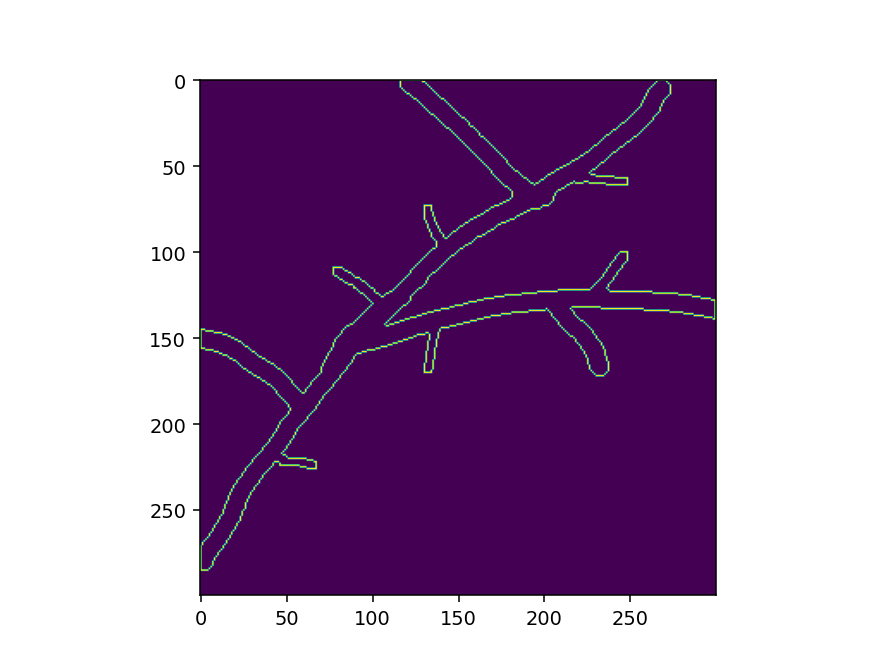

[0 1]


In [9]:
%matplotlib notebook
# operação de erosão para analisar os pixeis de borda
img_borda = img - ndi.binary_erosion(img)

plt.figure()
plt.imshow(img_borda)
print(np.unique(img_borda))

<IPython.core.display.Javascript object>


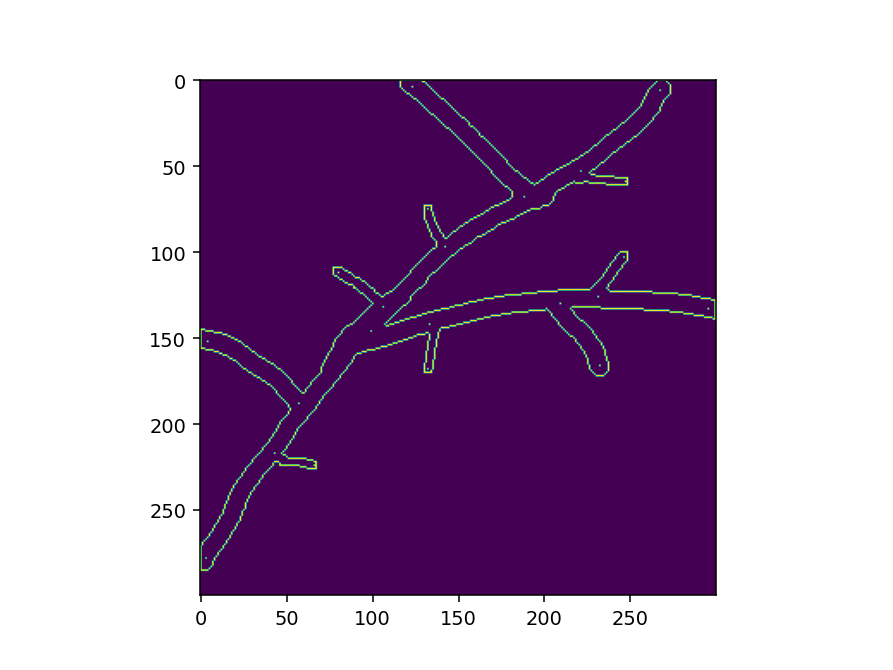

In [10]:
#pontos_bif = []
img_bif = np.zeros(img.shape, np.uint8)

for ponto in graph_skeleton.nodes:
    ponto_bif = graph_skeleton.nodes(data=True)[ponto]['center']
    img_bif[ponto_bif] = 1
#print(pontos_bif)
#img_bif[pontos_bif] = 1

plt.figure()
plt.imshow(img_bif + img_borda)

In [11]:
"""#pontos_borda
borda_ = np.nonzero(img_borda)
borda_1 = []
for i in range(len(borda_[0])):
    borda_1.append([borda_[0][i], borda_[1][i]])
print(np.unique(borda_1 == pontos_borda))"""

'#pontos_borda\nborda_ = np.nonzero(img_borda)\nborda_1 = []\nfor i in range(len(borda_[0])):\n    borda_1.append([borda_[0][i], borda_[1][i]])\nprint(np.unique(borda_1 == pontos_borda))'

<IPython.core.display.Javascript object>


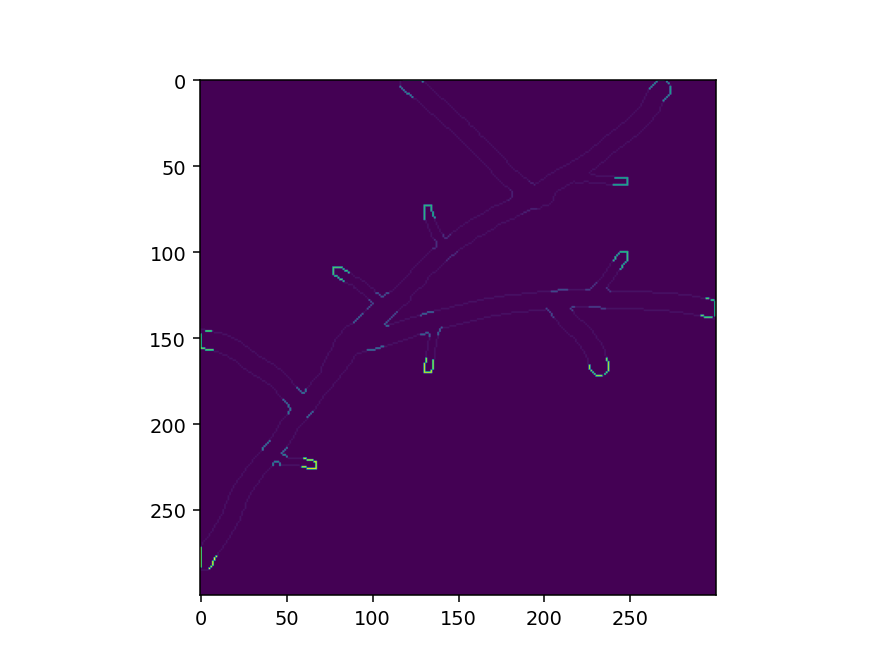

In [12]:
from scipy.spatial.distance import cdist

img_print = np.zeros(img.shape)
pontos_bif = []
pontos_borda = []

for ponto in graph_skeleton.nodes:
    pontos_bif.append(graph_skeleton.nodes(data=True)[ponto]['center'])
    
pontos_bif = np.array(pontos_bif)

for i in range(img_borda.shape[0]):
    for j in range(img_borda.shape[1]):
        if img_borda[i, j] == 1:
            pontos_borda.append([i, j])

pontos_borda = np.array(pontos_borda)

k = 20

m_dist = cdist(pontos_bif, pontos_borda)

ind = np.argsort(m_dist, axis = 1)

k_pontos_proximos = pontos_borda[ind[:, :k], :]

dict_close = {}

for idx_bif in range(len(pontos_bif)):
    pontos_proximos = pontos_borda[ind[idx_bif, :k], :]
    dict_close[idx_bif] = pontos_proximos
    for i in pontos_proximos:
        img_print[i[0], i[1]] = idx_bif

plt.figure()
plt.imshow(img_print+img_borda)

# proxima reunião

Agora que deu certo as identificação das bifurcações, então o proximo passo é identificar os componentes conexos de cada bifurcação para assim, cosneguirmos traçar a linha que queremos para identificar o innerlength.

Para isso, tem um algoritmo no print na area de trabalho, com ele, conseguimos identificar os pixeis vizinhos e os componentes conexos para separarmos os ramos, dps de termos duas linhas conexas, podemos encontrar o pixel central, mas isso eh outra etapa

Usaremos a imagem de ID do outro notebook para separar os componentes conexos e comparar pra ver se existe pelo menos um pixel de cada componente conexo que esteja dentro do ID de interesse, com isso, encontraremos os dois conjuntos de pixeis que queremos

In [13]:
list(graph_skeleton.edges(0, keys = True))[0]

(0, 1, 0)

True


<IPython.core.display.Javascript object>


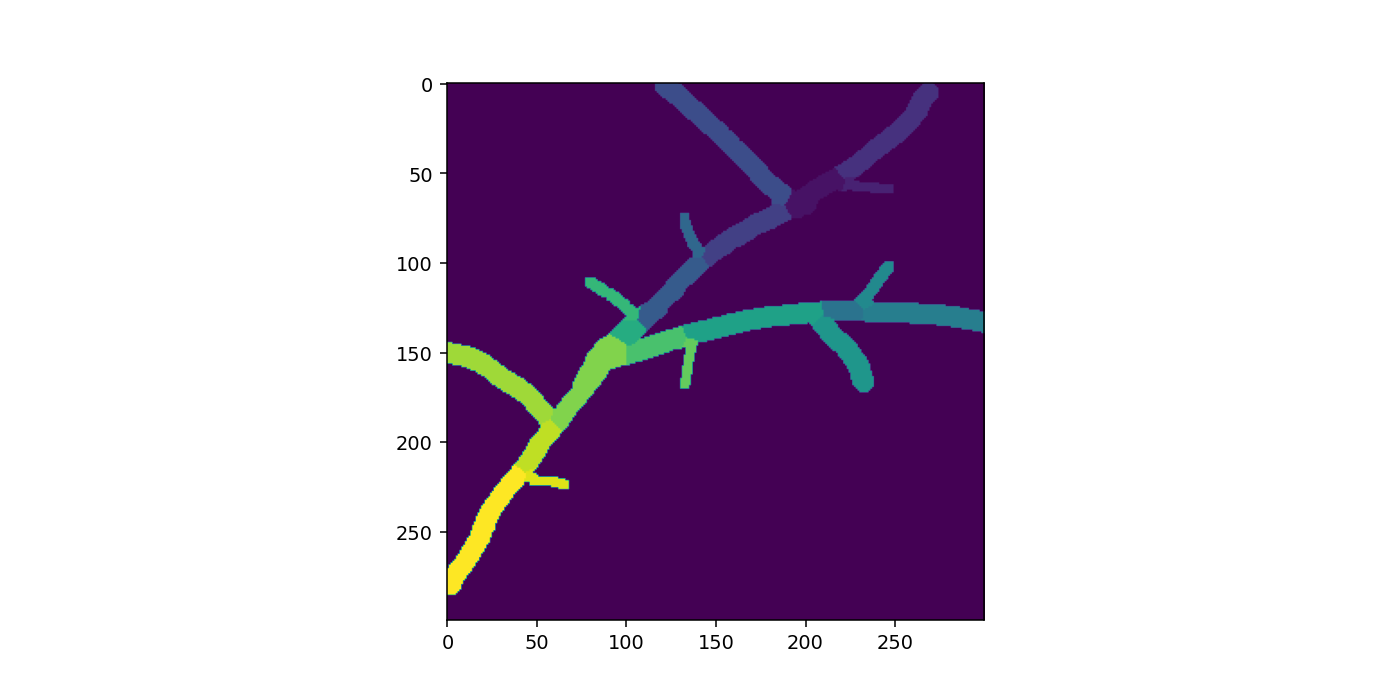

In [14]:
# MUDANÇA
# criação da imagem de ID

color = (255,255,255)
img_graph_skel = util.graph_to_img(graph_skeleton, img_shape = img.shape, node_color = (0,0,0), 
                                   node_pixels_color = (0,0,0),
                                   edge_color = color)

img_graph_skel = transform_nonbinary(img_graph_skel)
img_distancia, indices = distance(1-img_graph_skel, return_indices=True)


img_id_func = np.zeros(img.shape, dtype = np.uint8)

node_branch = []

row, col = np.nonzero(img)
print(len(row) == len(col))
for idx in range(len(row)):
    pixel_skel = (indices[0, row[idx], col[idx]], indices[1, row[idx], col[idx]])
    for i, edge in enumerate(graph_skeleton.edges, 1):
        # descobrindo nós terminais
        branch = graph_skeleton.get_edge_data(edge[0], edge[1])[0]['is_branch']
        row_col = graph_skeleton.get_edge_data(edge[0], edge[1])[0]['path']
        if pixel_skel in row_col:
            #print('entrou aqui')
            img_id_func[row[idx], col[idx]] = i
        if branch is True:
            node_branch.append(i)
        
"""
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if img[row, col] > 0 :
            pixel_skel = (indices[0,row, col], indices[1, row, col])
            
            
            for idx, edge in enumerate(graph_skeleton.edges, 1):
                # descobrindo nós terminais
                branch = graph_skeleton.get_edge_data(edge[0], edge[1])[0]['is_branch']
                row_col = graph_skeleton.get_edge_data(edge[0], edge[1])[0]['path']
                if pixel_skel in row_col:
                    #print('entrou aqui')
                    img_id_func[row, col] = idx
                if branch is True:
                    node_branch.append(idx)
                    """
img_id = np.zeros(img.shape, dtype = np.uint8)
row, col = np.nonzero(img)
img_id[row, col] = img_id_func[row, col]

node_branch = np.unique(node_branch)

plt.figure(figsize = (10, 5))
plt.imshow(img_id)

In [15]:
def neibor_4(pixel):
    list_viz = [(pixel[0], pixel[1]-1),
                        (pixel[0], pixel[1]+1),
                        (pixel[0] + 1, pixel[1]),
                        (pixel[0] - 1, pixel[1])
                        ]
    return set(list_viz)

In [16]:
def neibor_8(pixel):
    list_viz = [(pixel[0], pixel[1]-1),
                        (pixel[0], pixel[1]+1),
                        (pixel[0] + 1, pixel[1]),
                        (pixel[0] - 1, pixel[1]),
                        (pixel[0] + 1, pixel[1]-1),
                        (pixel[0] - 1, pixel[1]+1),
                        (pixel[0] - 1, pixel[1]-1),
                        (pixel[0] + 1, pixel[1]+1)
                       ]
    return set(list_viz)

In [17]:
dict_close

{0: array([[ 54, 226],
        [ 53, 227],
        [ 55, 227],
        [ 59, 223],
        [ 59, 224],
        [ 60, 221],
        [ 52, 228],
        [ 60, 220],
        [ 60, 222],
        [ 59, 225],
        [ 47, 217],
        [ 59, 217],
        [ 46, 219],
        [ 60, 219],
        [ 55, 228],
        [ 46, 218],
        [ 60, 218],
        [ 47, 216],
        [ 48, 215],
        [ 45, 220]]),
 1: array([[ 68, 181],
        [ 67, 181],
        [ 66, 181],
        [ 65, 181],
        [ 69, 180],
        [ 75, 192],
        [ 76, 190],
        [ 76, 191],
        [ 75, 193],
        [ 64, 180],
        [ 60, 192],
        [ 77, 188],
        [ 77, 189],
        [ 70, 179],
        [ 61, 194],
        [ 75, 194],
        [ 60, 193],
        [ 59, 191],
        [ 75, 195],
        [ 78, 187]]),
 2: array([[ 92, 142],
        [ 97, 137],
        [ 96, 137],
        [ 92, 143],
        [ 95, 137],
        [ 94, 137],
        [ 98, 136],
        [ 91, 141],
        [ 91, 144],
       

In [18]:
dict_comps = {}

for key in range(len(dict_close)):
    pixels = dict_close[key]
    #print(key)
    pixels_set = set(tuple(i) for i in zip(pixels[:, 0], pixels[:, 1]))
    comps = []
    for i in range(3):
        comp_set = []
        if len(pixels_set) == 0:
            continue
        for pixel in pixels_set:
            list_viz = neibor_8(pixel)
            # numeros de vizinhos
            num_nei = 0
            for pix_viz in list_viz:
                if pix_viz in pixels_set:
                    num_nei += 1
            if num_nei == 1:
                break
        pixels_set.remove(pixel)
        comp_set.append(pixel)
        pix_to_visit = [pixel] 

        while len(pix_to_visit) > 0:
            pixel = pix_to_visit.pop(0)
            list_viz = neibor_8(pixel)

            for pix_viz in list_viz:
                if pix_viz in pixels_set:
                    pixels_set.remove(pix_viz)
                    comp_set.append(pix_viz)
                    pix_to_visit.append(pix_viz)
        comps.append(list(comp_set))
    if len(pixels_set) > 0:
        print('não fechou tudo')
    dict_comps[key] = comps

In [19]:
# printando o tamanho de cada uma das chaves do dicionario
for i in range(len(dict_comps)):
    print(i, len(dict_comps[i]))

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 2
11 3
12 1
13 1
14 1
15 1
16 3
17 2
18 2
19 1
20 1
21 2


<IPython.core.display.Javascript object>


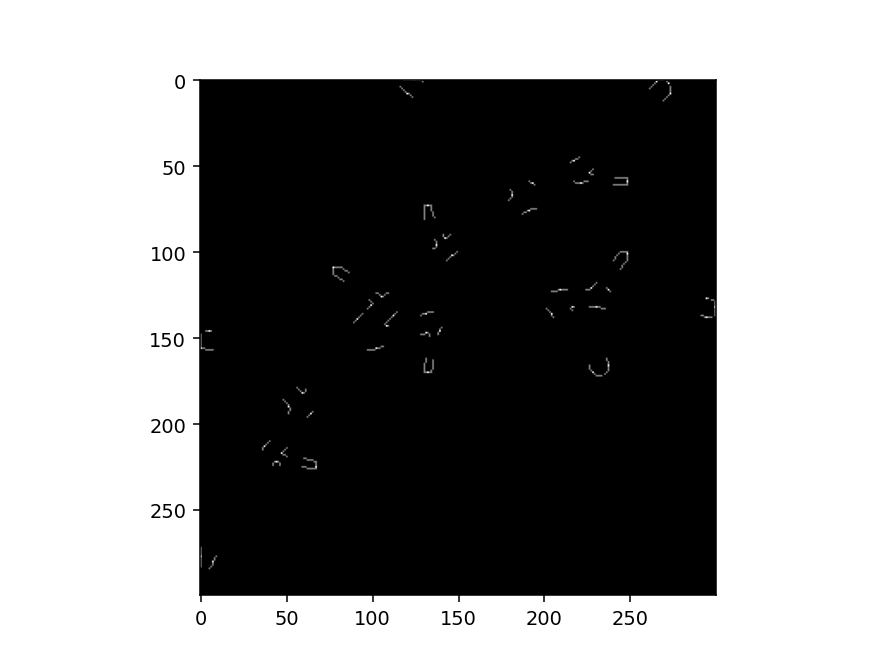

In [20]:
# criando uma imagem para visualizar os pixeis centrais
img_bif_id = np.zeros(img.shape, np.uint8)
for bif, comps in dict_comps.items():
    for comp in comps:
        for index, pixel in enumerate(comp):
            
            img_bif_id[pixel] = 128
        pixel_central = comp[len(comp)//2]
        img_bif_id[pixel_central] = 255
        #print(img_id[pixel_central])
plt.figure()
plt.imshow(img_bif_id, 'gray')

Proxima Reuniãooooo

Agora temos qe identificar os componentes do mesmo nó usando a imagem de IDS que colocamos de volta nesse notebook

Depois de identificar os componentens do mesmo nó, temos então qe traçar a linha sobre todos os componentes de cada id que estamos trabalhando, provavelmente ele traçará sobre dois pontos centrais que fizemos acima

depois de traçar a linha, faremos que percorra do esqueleto até cada uma das pontas da imagem, ai dps de identificar calcular a distancia do pixel da interesecção da linah com o esqueleto até a bifurcação correspondente

# PROXIMA REUNIAO 22/05/2023

Para proxima reunião temos que melhorar o algoritmo pra identificar os nós terminais, assim tem um algoritmo base no desktop chamado 'corte da linha.jpeg', com esse algoritmo conseguimos entçao identificar as arestas, as bifurcações e saber os visinhos de um determinado nó para sabermos se ele vai ter grau 1 ou nao. 

Dps disso eh criado um vetor para identificar os componentes que interligam essa aresta e provavelmente sairá um vetor com duas posições para traçar a linha

MAs a ideia principal é identificar os nós terminais e fazer com que ele identifique só os nós terminais

A função get .. (node_id) que ta na fotyo ´e essa função acima ai

In [21]:
def get_edge_id_from_node(node_id, dict_edges):
    """Assume que o nó tenha grau 1"""
    edges = list(graph_skeleton.edges(node_id, keys = True))[0]
    edges = (edges[1], edges[0], edges[-1])
    return dict_edges[edges], edges

In [22]:
graph_skeleton.get_edge_data(0, 1)[0]['path']

[(54, 220),
 (54, 219),
 (54, 218),
 (54, 217),
 (55, 216),
 (55, 215),
 (55, 214),
 (55, 213),
 (56, 212),
 (56, 211),
 (57, 210),
 (57, 209),
 (58, 208),
 (59, 207),
 (59, 206),
 (60, 205),
 (60, 204),
 (61, 203),
 (62, 202),
 (63, 202),
 (64, 201),
 (65, 200),
 (66, 199),
 (67, 198),
 (67, 197),
 (67, 196),
 (67, 195),
 (67, 194),
 (67, 193),
 (68, 192),
 (68, 191),
 (68, 190),
 (68, 189)]

In [23]:
def get_component_id(node_terminate, dict_edges, dict_comps):
    """
    Função para encontrar o ponto central de cada um dos componentes conexos de cada nó terminal
    
    Inputs:
    node_terminate: [list] lista contendo os nós terminais
    dict_edges: [dict] dicionario contendo as arestas de um determinado grafo
    dict_comps: [dict] dicionario contendo os componentes de cada aresta
    
    Output:
    dict_id_comp: [dict] dicionario contendo dois pontos para cada uma das arestas
    """
    # dicionario que conterá os ids
    dict_id_comp = {}
    
    
    for node in node_terminate:
        edge_id, _ = get_edge_id_from_node(node, dict_edges)
        bif_id = list(graph_skeleton.neighbors(node))[0]
        comp_in =[]
        for comp in dict_comps[bif_id]:
            if img_id[comp[0]] == edge_id or img_id[comp[-1]] == edge_id:
                comp_in.append(comp[len(comp)//2])
        linha = skimage.draw.line(comp_in[0][0], comp_in[0][1], comp_in[1][0], comp_in[1][1])
        # dicionario que conterá a linha e os pontos
        line = {}
        line['line'] = linha
        line['pixels'] = comp_in
        dict_id_comp[node] = line
    return dict_id_comp


In [24]:
def find_terminate_node(graph):
    """
    Função para encontrar os nós terminais de um grafo
    
    Input:
    graph: [networkx multigraph] grafo para analise
    
    output:
    node_terminate: [list] nós terminais do grafo
    """
    node_terminate = []
    for node in graph:
        if graph.degree(node) == 1:
            node_terminate.append(node)
    return node_terminate

In [25]:
def find_edges(graph):
    """
    Função que retorna todas as arestas de um grafo
    
    Input:
    graph: [networkx multigraph] grafo para analise
    
    output:
    dict_edges: [dict] contem as arestas do grafo
    """
    dict_edges = {}
    for idx, edge in enumerate(graph.edges(keys = True), 1):
        dict_edges[edge] = idx
    return dict_edges

In [26]:
# Encontrando os nós terminais
terminate_degree = find_terminate_node(graph_skeleton)
print('terminate node:', terminate_degree)

# Separando as arestas para analise
dict_edges = find_edges(graph_skeleton)
print('\nedges:', dict_edges)

# Encontrando o ponto central de cada componente de cada aresta
dict_id_comp = get_component_id(terminate_degree, dict_edges, dict_comps)
print('\ncentral component:', dict_id_comp)  

terminate node: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

edges: {(0, 1, 0): 1, (0, 12, 0): 2, (0, 11, 0): 3, (1, 2, 0): 4, (1, 10, 0): 5, (2, 5, 0): 6, (2, 13, 0): 7, (3, 4, 0): 8, (3, 16, 0): 9, (3, 14, 0): 10, (4, 18, 0): 11, (4, 6, 0): 12, (5, 7, 0): 13, (5, 15, 0): 14, (6, 7, 0): 15, (6, 19, 0): 16, (7, 8, 0): 17, (8, 17, 0): 18, (8, 9, 0): 19, (9, 20, 0): 20, (9, 21, 0): 21}

central component: {10: {'line': (array([67, 66, 66, 65, 65, 64, 63, 63, 62, 62, 61, 61, 60]), array([181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193])), 'pixels': [(67, 181), (60, 193)]}, 11: {'line': (array([47, 48, 49, 49, 50, 51, 52, 52, 53, 54]), array([217, 218, 219, 220, 221, 222, 223, 224, 225, 226])), 'pixels': [(47, 217), (54, 226)]}, 12: {'line': (array([60, 59, 58, 57, 56, 55, 54]), array([221, 222, 223, 224, 224, 225, 226])), 'pixels': [(60, 221), (54, 226)]}, 13: {'line': (array([92, 93, 94, 94, 95, 96]), array([142, 141, 140, 139, 138, 137])), 'pixels': [(92, 142), (96,

<IPython.core.display.Javascript object>


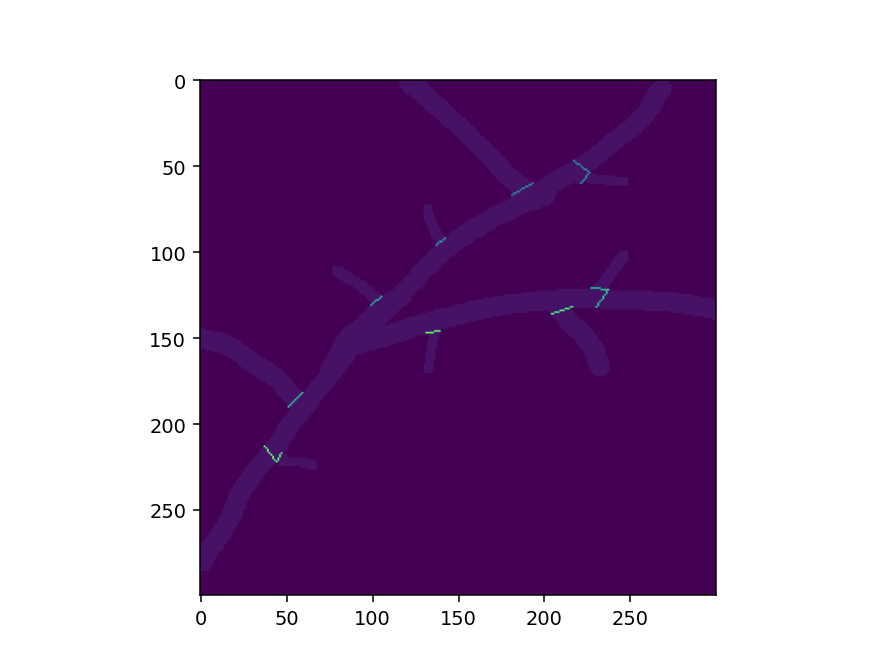

In [27]:
# Celula para demonstrar as linhas traçadas na imagem
img_test = img.copy()
for bif, comp in dict_id_comp.items():
    pos = comp['line']
    img_test[pos]  = bif
plt.figure()
plt.imshow(img_test)

In [28]:
print(dict_id_comp[10]['line'])
for i in pos:
    if [213, 37] == [i]:
        print('True')
print([213, 37] == [pos[0][0], pos[1][0]])

(array([67, 66, 66, 65, 65, 64, 63, 63, 62, 62, 61, 61, 60]), array([181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193]))
True


# Proxima reunião 29/05/2023

Agora que temos os ramos separados junto com as linhas, o proximo passo que temos que fazer é calcular o esqueleto e então calcular a distancia do nó de bifurcação até a linha e depois calcular da linha até o ramo terminal.

Para isso então calcularemos o comprimento de arco que pode ser uma distancia euclidiana ou de pitagoras, separaremos a aresta que estamos analisando e calcularemos a distancia.

In [29]:
def find_pixel_in(dict_id_comp):
    for idx, value in enumerate(dict_id_comp.items()):
        _, node = get_edge_id_from_node(value[0], dict_edges)
        path = graph_skeleton.get_edge_data(node[0], node[1])[0]['path']
        line = value[1]['line']
        flag = False

        for i in range(len(value[1]['line'][0])):
            pixel = (line[0][i], line[1][i])
            if pixel in path:
                dict_id_comp[value[0]]['pixel_inner'] = pixel
                flag = True
                break
            else:
                pix_viz = neibor_4(pixel)
                for j in range(len(path)):
                    pixel_skel = path[j]

                    if pixel_skel in pix_viz:
                        dict_id_comp[value[0]]['pixel_inner'] = pixel_skel
                        flag = True
                        break
            if flag:
                break


        if flag is False:
            dict_id_comp[value[0]]['pixel_inner'] = None
            print(node, False)
    return

In [31]:
"""print(dict_id_comp.keys(), '\n\n\n')
print(value[1]['line'])

print(value)
print(pixel_in)"""

"print(dict_id_comp.keys(), '\n\n\n')\nprint(value[1]['line'])\n\nprint(value)\nprint(pixel_in)"

In [32]:
for idx, value in enumerate(dict_id_comp.items()):
    _, node = get_edge_id_from_node(value[0], dict_edges)
    path = graph_skeleton.get_edge_data(node[0], node[1])[0]['path']
    line = value[1]['line']
    flag = False

    for i in range(len(value[1]['line'][0])):
        pixel = (line[0][i], line[1][i])
        if pixel in path:
            dict_id_comp[value[0]]['pixel_inner'] = pixel
            flag = True
            break
        else:
            pix_viz = neibor_4(pixel)
            for j in range(len(path)):
                pixel_skel = path[j]
                
                if pixel_skel in pix_viz:
                    dict_id_comp[value[0]]['pixel_inner'] = pixel_skel
                    flag = True
                    break
        if flag:
            break
                
                
    if flag is False:
        dict_id_comp[value[0]]['pixel_inner'] = None
        print(node, False)

In [33]:
for idx, value in enumerate(dict_id_comp.items()):
    print(value[1])

{'line': (array([67, 66, 66, 65, 65, 64, 63, 63, 62, 62, 61, 61, 60]), array([181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193])), 'pixels': [(67, 181), (60, 193)], 'pixel_inner': (65, 186)}
{'line': (array([47, 48, 49, 49, 50, 51, 52, 52, 53, 54]), array([217, 218, 219, 220, 221, 222, 223, 224, 225, 226])), 'pixels': [(47, 217), (54, 226)], 'pixel_inner': (50, 222)}
{'line': (array([60, 59, 58, 57, 56, 55, 54]), array([221, 222, 223, 224, 224, 225, 226])), 'pixels': [(60, 221), (54, 226)], 'pixel_inner': (56, 224)}
{'line': (array([92, 93, 94, 94, 95, 96]), array([142, 141, 140, 139, 138, 137])), 'pixels': [(92, 142), (96, 137)], 'pixel_inner': (95, 140)}
{'line': (array([122, 122, 122, 122, 122, 121, 121, 121, 121, 121, 121]), array([237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227])), 'pixels': [(122, 237), (121, 227)], 'pixel_inner': (122, 233)}
{'line': (array([131, 130, 129, 128, 128, 127, 126]), array([ 99, 100, 101, 102, 103, 104, 105])), 'pixels': [(131, 99

In [34]:
def find_innerlenght(graph, dict_id_comps, dict_edges):
    '''
    This function find the graph innerlenght for each node
    
    Input:
    graph: [networkx multigraph] graph contain skeleton
    dict_id_comps: [dict] dictiomary contain terminate nodes, pixels for trace a line, 
        and pixel_inner (pixel to intersection of skeleton and line)
    dict_edges: [dict] dictionary contain all edges to graph
    
    Output:
    
    '''
    
    for _, value in enumerate(dict_id_comps.items()):
        edge = get_edge_id_from_node(value[0], dict_edges)[1]
        pixeis = graph.get_edge_data(edge[0], edge[1])[0]['path']
        point_in = value[1]['pixel_inner']
        if point_in is None:
            dict_id_comps[value[0]]['inner_lenght'] = None
            continue
        inner_lenght = 0
        for idx in range(1, len(pixeis)):
            row, col = pixeis[idx]
            if (row, col - 1) == pixeis[idx - 1] or (row-1, col) == pixeis[idx - 1] or (row, col + 1) == pixeis[idx - 1] or (row + 1, col) == pixeis[idx - 1]:
                inner_lenght += 1
            elif (row-1, col - 1) == pixeis[idx - 1] or (row+1, col - 1) == pixeis[idx - 1] or (row-1, col + 1) == pixeis[idx - 1] or (row + 1, col + 1) == pixeis[idx - 1]:
                inner_lenght += np.sqrt(2)
            if pixeis[idx] == point_in:
                break
        dict_id_comps[value[0]]['inner_lenght'] = inner_lenght
    return

In [35]:
find_innerlenght(graph_skeleton, dict_id_comp, dict_edges)
for idx in dict_id_comp:
    print(idx, dict_id_comp[idx]['inner_lenght'])

10 2.414213562373095
11 2.414213562373095
12 2.8284271247461903
13 1.4142135623730951
14 3.414213562373095
15 4.242640687119286
16 1
17 1.4142135623730951
18 3.414213562373095
19 3.414213562373095
20 1.4142135623730951
21 2


<IPython.core.display.Javascript object>


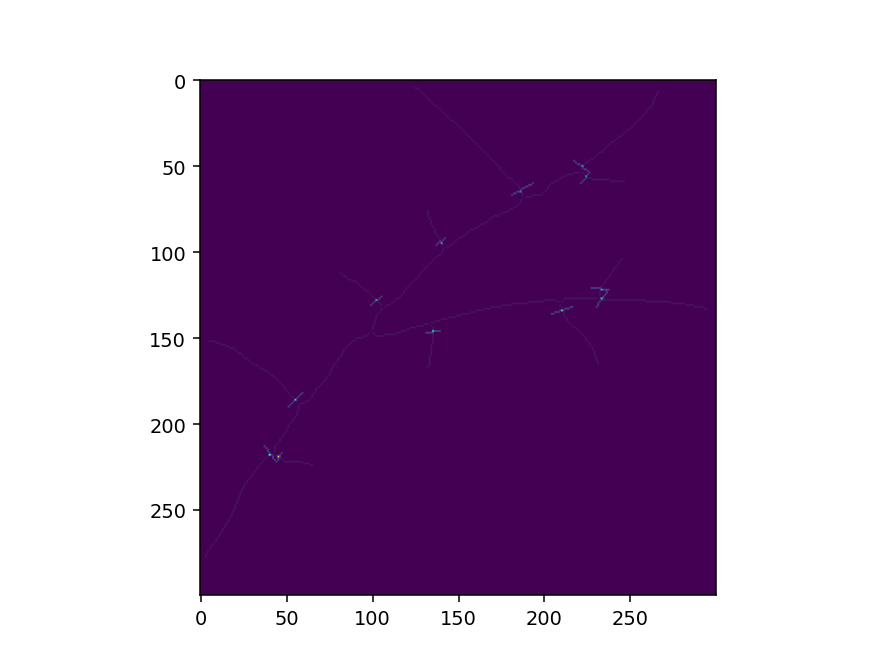

In [36]:
img_test2 = img_graph_skel.copy()
for bif, comp in dict_id_comp.items():
    pos = comp['line']
    img_test2[pos] = 4
    pos = comp['pixel_inner']
    if pos is None:
        continue
    img_test2[pos] = bif
    
plt.figure()
plt.imshow(img_test2)

In [38]:
graph_skeleton

# Proxima reunião

* Calcular o length inteiro da aresta para ver se o length do grafo esta correto.

* Tentar dar uma melhorada nas funções para fazer uma modularização (de preferencia n precisar de tantos dicionarios como eu to usando).

* Tentar mesclar o tip_radius ja encontrado com o radius mean para calcularmos o bulge_size e verificar se esta de acordo

In [79]:
print(indices[0].shape)
print(indices[0][0:5, 0:5])
print(indices[1][0:5, 0:5])

(300, 300)
[[4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]]
[[124 124 124 124 124]
 [124 124 124 124 124]
 [124 124 124 124 124]
 [124 124 124 124 124]
 [124 124 124 124 124]]


In [89]:
a = np.where((indices[0] == 4)&((indices[1] == 124)))
b = np.where(indices[1] == [124])
print(len(a), len(a[0]))
print(a[0][0])
#print(np.where(a == b))
print(indices.shape)

2 3918
0
(2, 300, 300)


In [92]:
print(np.nonzero(img_test))

(array([  0,   0,   0, ..., 285, 285, 285]), array([116, 117, 118, ...,   2,   3,   4]))


<IPython.core.display.Javascript object>


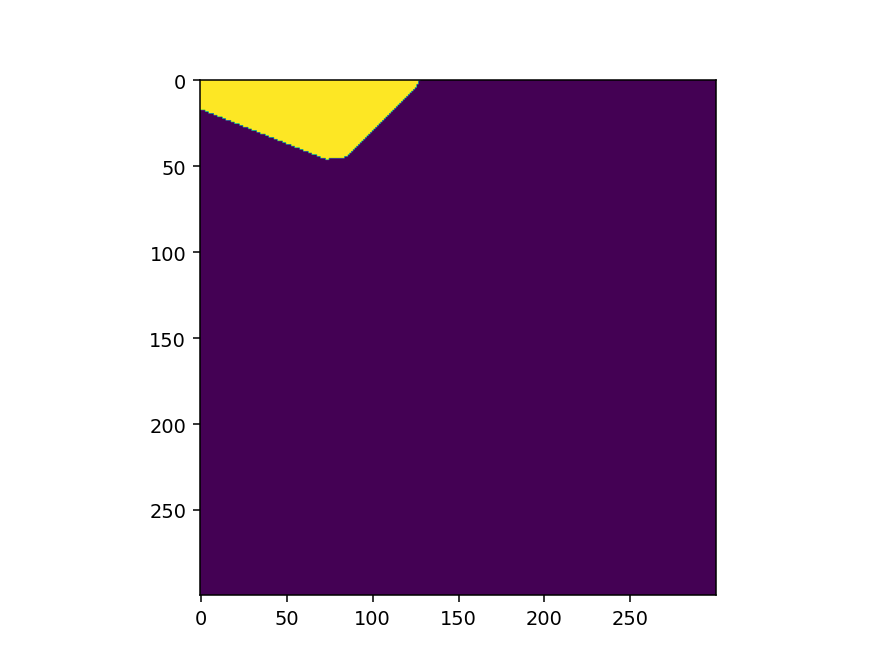

In [80]:
plt.figure()
img_ = np.zeros((300,300))
img_[a] = 1
plt.imshow(img_)

In [48]:
indices.shape

(2, 300, 300)

In [49]:
indices[0][0], indices[1][0]

(array([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  7,
         7,  8,  8,  9,  9, 10, 10, 11, 11, 12, 15, 15, 15, 15, 15, 15, 15,
        15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 24, 24, 24, 24, 24, 24, 24,
        24, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31,
        32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 42, 42, 42, 42, 36,
        36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 33, 33, 33, 33, 33,
        29, 